In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn
from scipy import stats
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error

In [50]:
file_path = "/Users/igmark/Desktop/WGU Data Files/D208_churn_clean.csv"
df = pd.read_csv(file_path)

In [51]:
df.info(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

# Detecting Outliers

# Children

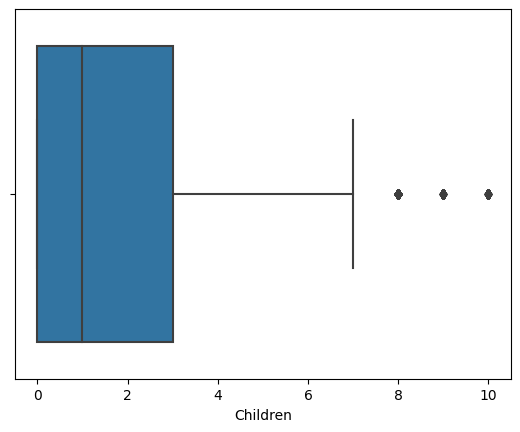

In [52]:
boxplot=seaborn.boxplot(x='Children',data=df)

# Tenure

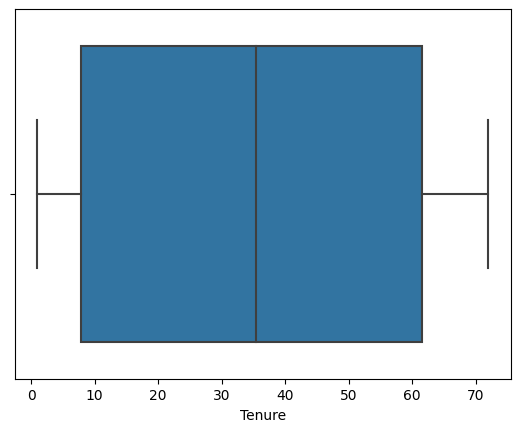

In [53]:
boxplot=seaborn.boxplot(x='Tenure',data=df)

# Yearly_equip_failure

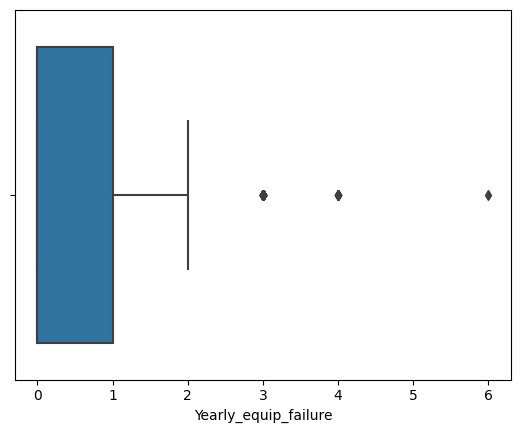

In [54]:
boxplot=seaborn.boxplot(x='Yearly_equip_failure',data=df)

# MonthlyCharge

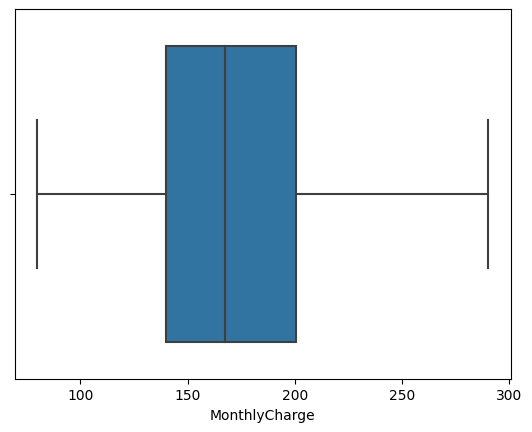

In [55]:
boxplot=seaborn.boxplot(x='MonthlyCharge',data=df)

# Age

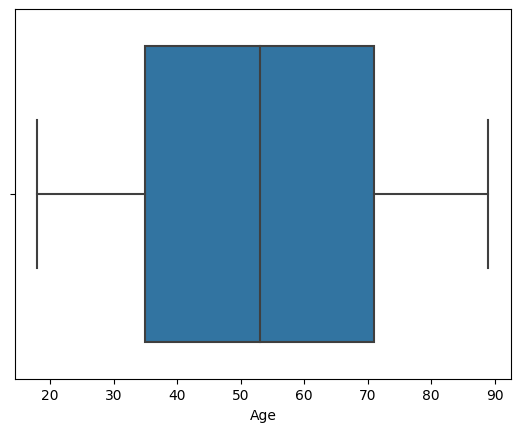

In [56]:
boxplot=seaborn.boxplot(x='Age',data=df)

# Income

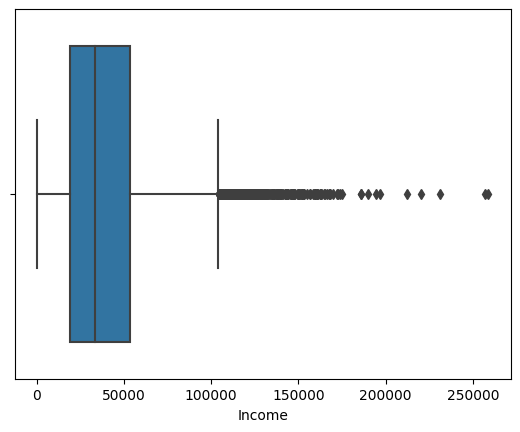

In [57]:
boxplot=seaborn.boxplot(x='Income',data=df)

# Email

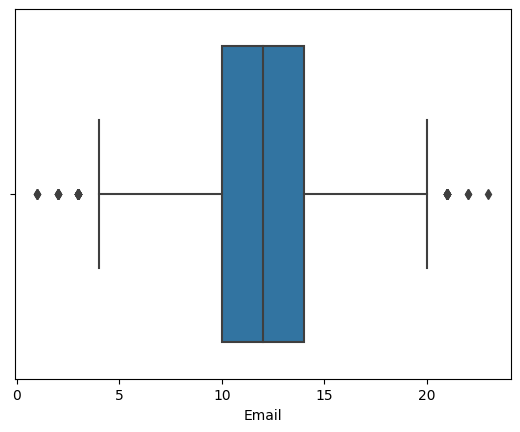

In [58]:
boxplot=seaborn.boxplot(x='Email',data=df)

# Contacts

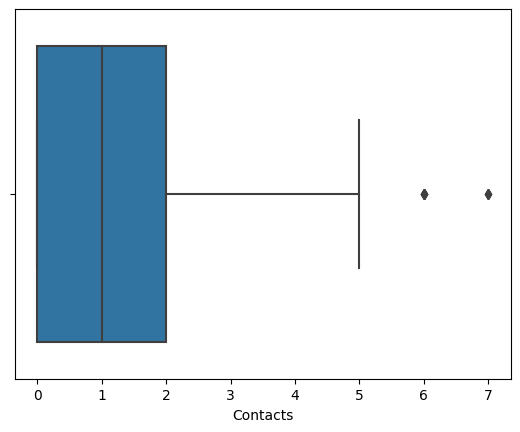

In [59]:
boxplot=seaborn.boxplot(x='Contacts',data=df)

# Population

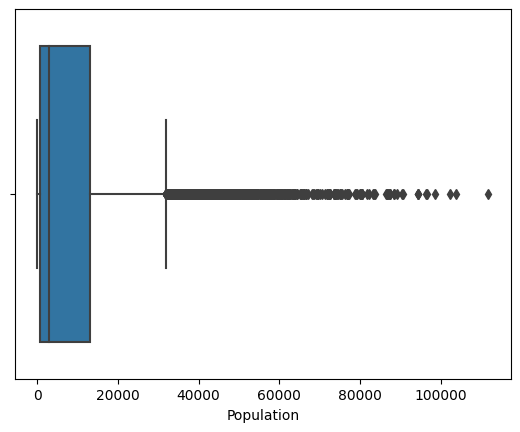

In [60]:
boxplot=seaborn.boxplot(x='Population',data=df)

# Outage_sec_perweek

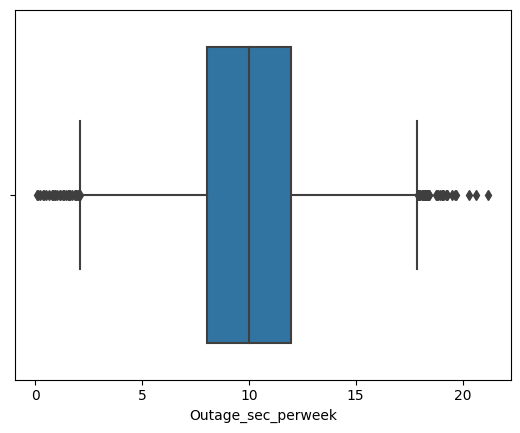

In [61]:
boxplot=seaborn.boxplot(x='Outage_sec_perweek',data=df)

# Bandwidth_GB_Year

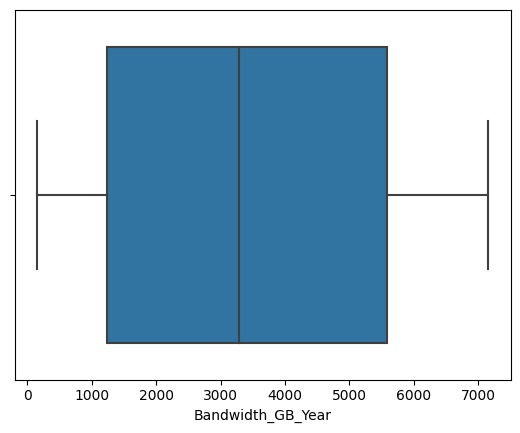

In [62]:
boxplot=seaborn.boxplot(x='Bandwidth_GB_Year',data=df)

In [169]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with numerical and categorical variables
data = {
    'Children': [0, 1, 0, 1, 2],
    'Tenure': [10, 20, 30, 40, 50],
    'Yearly_equip_failure': [0, 1, 0, 2, 1],
    'MonthlyCharge': [50, 75, 100, 125, 150],
    'Age': [25, 30, 35, 40, 45],
    'Income': [50000, 60000, 70000, 80000, 90000],
    'Email': [2, 4, 6, 8, 10],
    'Contacts': [1, 3, 5, 7, 9],
    'Outage_sec_perweek': [10, 20, 30, 40, 50],
    'Population': [100, 200, 300, 400, 500],
    'Bandwidth_GB_Year': [250, 500, 750, 1000, 1250],
    'Phone': ['No', 'Yes', 'No', 'Yes', 'No'],
    'TechSupport': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Techie': ['No', 'Yes', 'No', 'Yes', 'No'],
    'Gender': ['M', 'F', 'M', 'F', 'M']
}
df = pd.DataFrame(data)


# Reexpression of Categorical Variables

In [170]:
from sklearn.preprocessing import LabelEncoder

# Create an empty dictionary to store the new DataFrames
new_data = {}

# Create a label encoder object
le = LabelEncoder()

# Loop through each variable to remove outliers and store the non-outlier data in a new DataFrame
for col in ['Children', 'Tenure', 'Yearly_equip_failure', 'MonthlyCharge', 'Age', 'Income', 'Email', 'Contacts', 'Outage_sec_perweek', 'Population', 'Bandwidth_GB_Year', 'Phone', 'TechSupport', 'Techie']:
    
    # For categorical columns, apply label encoding
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
    
    # Calculate z-scores of the variable
    df['Z_Score_' + col] = (df[col] - df[col].mean()) / df[col].std()

    # Filter out the outliers based on the z-score criterion
    df_no_outliers = df[np.abs(df['Z_Score_' + col]) < threshold]

    # Drop the 'Z_Score_' + col column if it's no longer needed
    df_no_outliers = df_no_outliers.drop('Z_Score_' + col, axis=1)

    # Store the non-outlier data for the variable in a new DataFrame
    new_data[col] = df_no_outliers


In [146]:
new_data[col].info

<bound method DataFrame.info of    Children  Tenure  Yearly_equip_failure  MonthlyCharge  Age  Income  Email  \
0         0      10                     0             50   25   50000      2   
1         1      20                     1             75   30   60000      4   
2         0      30                     0            100   35   70000      6   
3         1      40                     2            125   40   80000      8   
4         2      50                     1            150   45   90000     10   

   Contacts  Outage_sec_perweek  Population  ...  Z_Score_MonthlyCharge  \
0         1                  10         100  ...              -1.264911   
1         3                  20         200  ...              -0.632456   
2         5                  30         300  ...               0.000000   
3         7                  40         400  ...               0.632456   
4         9                  50         500  ...               1.264911   

   Z_Score_Age  Z_Score_Income  Z_Sc

In [173]:
# Import necessary library
import pandas as pd

# Create a new DataFrame for the 'Gender' variable using one-hot encoding
gender_onehot = pd.get_dummies(new_data[col]['Gender'], prefix='Gender')

# Add the new DataFrame to the existing new_data dictionary
new_data[col] = pd.concat([new_data[col], gender_onehot], axis=1)


In [174]:
# Print out the resulting data frame for the 'Gender' variable
print(new_data[col])

print(df['Phone'].unique())
# Output: ['Yes' 'No']

# Apply label encoding to 'Phone' variable
df['Phone'] = le.fit_transform(df['Phone'])

print(df['Phone'].unique())
# Output: [1 0]


   Children  Tenure  Yearly_equip_failure  MonthlyCharge  Age  Income  Email  \
0         0      10                     0             50   25   50000      2   
1         1      20                     1             75   30   60000      4   
2         0      30                     0            100   35   70000      6   
3         1      40                     2            125   40   80000      8   
4         2      50                     1            150   45   90000     10   

   Contacts  Outage_sec_perweek  Population  ...  Z_Score_Income  \
0         1                  10         100  ...       -1.264911   
1         3                  20         200  ...       -0.632456   
2         5                  30         300  ...        0.000000   
3         7                  40         400  ...        0.632456   
4         9                  50         500  ...        1.264911   

   Z_Score_Email  Z_Score_Contacts  Z_Score_Outage_sec_perweek  \
0      -1.264911         -1.264911          

In [175]:
new_data[col].describe()

,Children,Tenure,Yearly_equip_failure,MonthlyCharge,Age,Income,Email,Contacts,Outage_sec_perweek,Population,...,Z_Score_Income,Z_Score_Email,Z_Score_Contacts,Z_Score_Outage_sec_perweek,Z_Score_Population,Z_Score_Bandwidth_GB_Year,Z_Score_Phone,Z_Score_TechSupport,Gender_F,Gender_M
count,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000
mean,0.80000,30.000000,0.80000,100.000000,35.000000,70000.000000,6.000000,5.000000,30.000000,300.000000,...,4.440892e-17,4.440892e-17,4.440892e-17,4.440892e-17,0.000000,4.440892e-17,0.000000,0.000000,0.400000,0.600000
std,0.83666,15.811388,0.83666,39.528471,7.905694,15811.388301,3.162278,3.162278,15.811388,158.113883,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,0.547723,0.547723
min,0.00000,10.000000,0.00000,50.000000,25.000000,50000.000000,2.000000,1.000000,10.000000,100.000000,...,-1.264911e+00,-1.264911e+00,-1.264911e+00,-1.264911e+00,-1.264911,-1.264911e+00,-0.730297,-1.095445,0.000000,0.000000
25%,0.00000,20.000000,0.00000,75.000000,30.000000,60000.000000,4.000000,3.000000,20.000000,200.000000,...,-6.324555e-01,-6.324555e-01,-6.324555e-01,-6.324555e-01,-0.632456,-6.324555e-01,-0.730297,-1.095445,0.000000,0.000000
50%,1.00000,30.000000,1.00000,100.000000,35.000000,70000.000000,6.000000,5.000000,30.000000,300.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-0.730297,0.730297,0.000000,1.000000
75%,1.00000,40.000000,1.00000,125.000000,40.000000,80000.000000,8.000000,7.000000,40.000000,400.000000,...,6.324555e-01,6.324555e-01,6.324555e-01,6.324555e-01,0.632456,6.324555e-01,1.095445,0.730297,1.000000,1.000000
max,2.00000,50.000000,2.00000,150.000000,45.000000,90000.000000,10.000000,9.000000,50.000000,500.000000,...,1.264911e+00,1.264911e+00,1.264911e+00,1.264911e+00,1.264911,1.264911e+00,1.095445,0.730297,1.000000,1.000000


# Univariate analysis- Explanatory Variables 

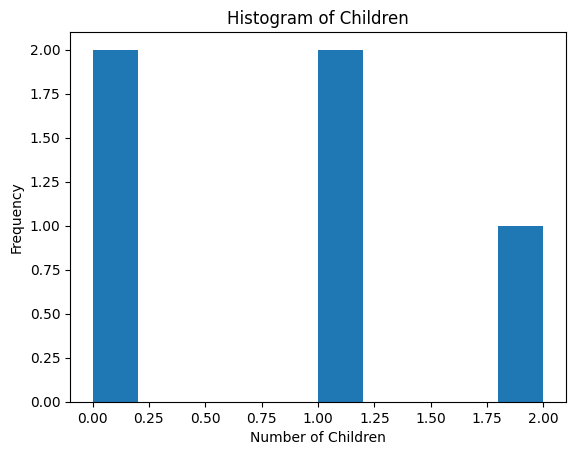

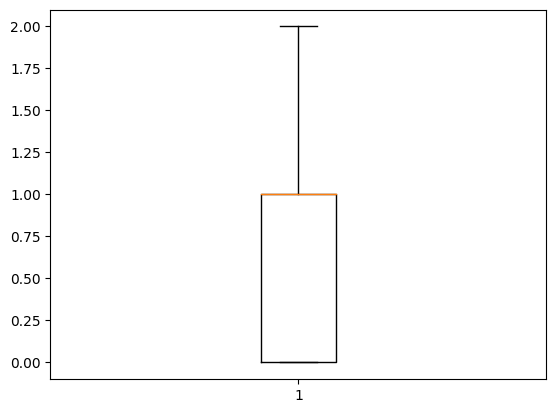

In [149]:
plt.hist(new_data[col]['Children'])
plt.title("Histogram of Children")
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['Children'])
plt.show()

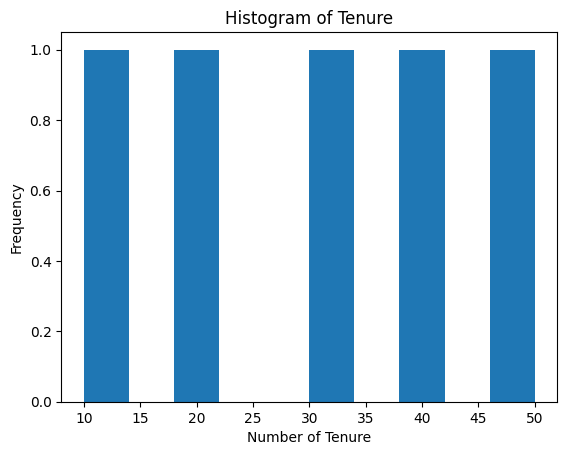

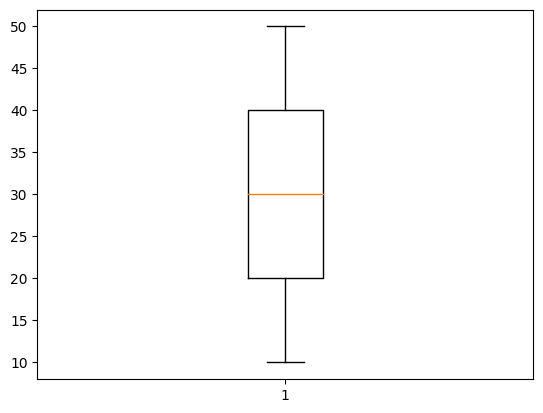

In [78]:
plt.hist(new_data[col]['Tenure'])
plt.title("Histogram of Tenure")
plt.xlabel("Number of Tenure")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['Tenure'])
plt.show()

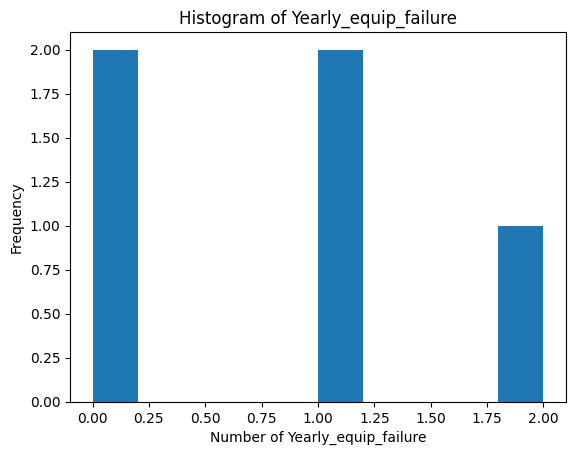

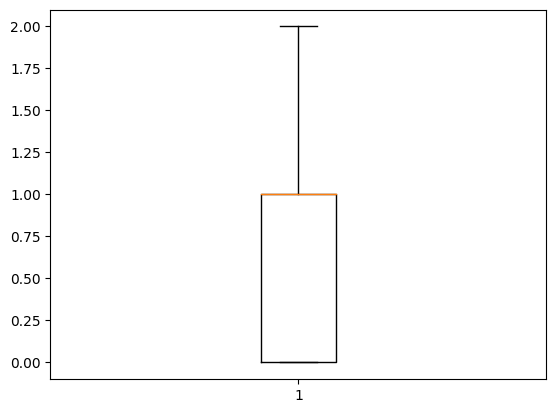

In [151]:
plt.hist(new_data[col]['Yearly_equip_failure'])
plt.title("Histogram of Yearly_equip_failure")
plt.xlabel("Number of Yearly_equip_failure")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['Yearly_equip_failure'])
plt.show()

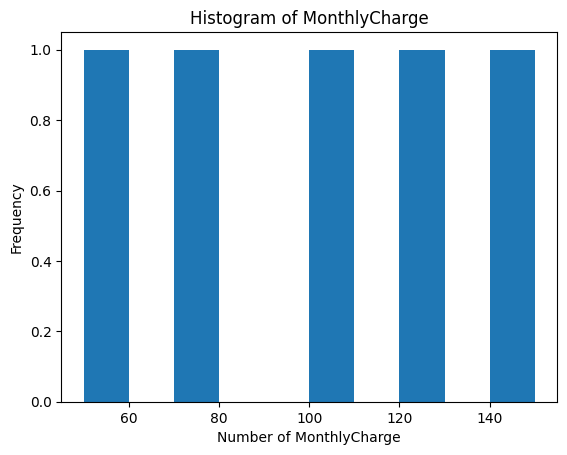

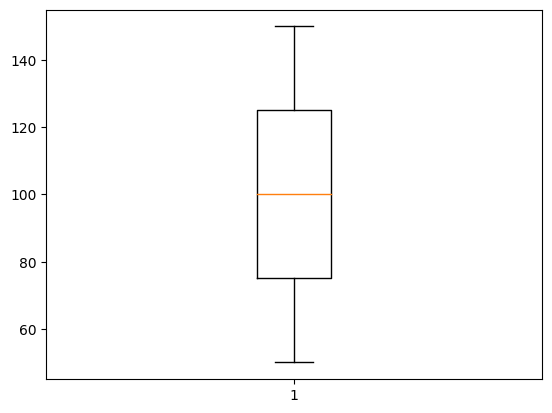

In [82]:
plt.hist(new_data[col]['MonthlyCharge'])
plt.title("Histogram of MonthlyCharge")
plt.xlabel("Number of MonthlyCharge")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['MonthlyCharge'])
plt.show()

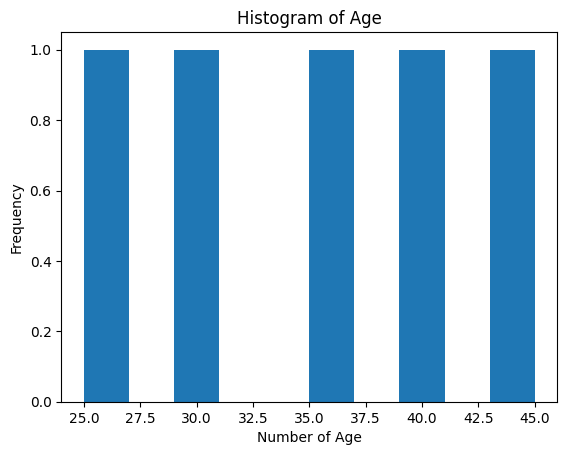

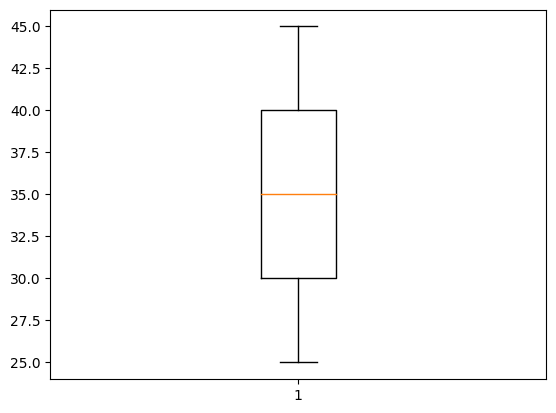

In [152]:
plt.hist(new_data[col]['Age'])
plt.title("Histogram of Age")
plt.xlabel("Number of Age")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['Age'])
plt.show()

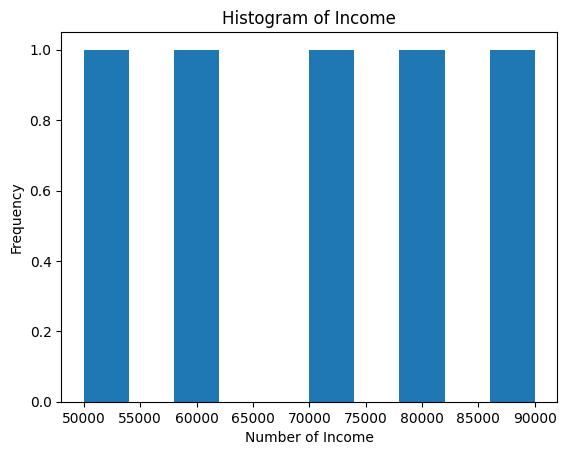

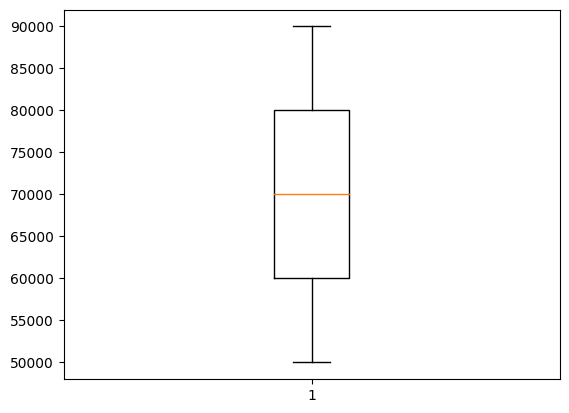

In [84]:
plt.hist(new_data[col]['Income'])
plt.title("Histogram of Income")
plt.xlabel("Number of Income")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['Income'])
plt.show()

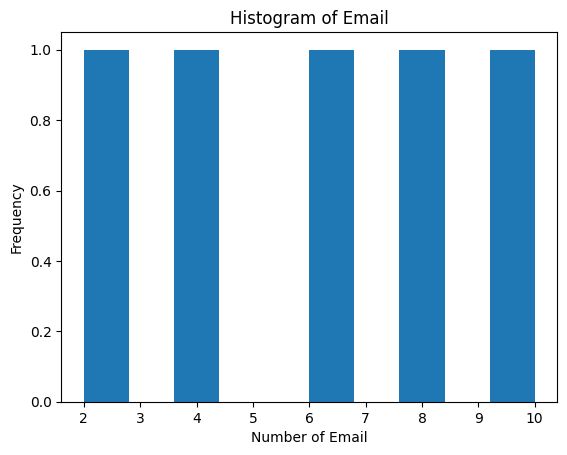

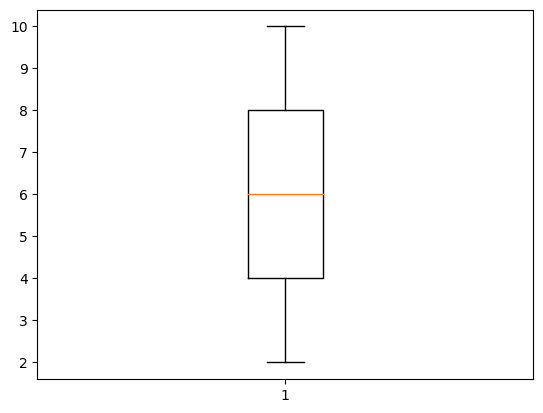

In [85]:
plt.hist(new_data[col]['Email'])
plt.title("Histogram of Email")
plt.xlabel("Number of Email")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['Email'])
plt.show()

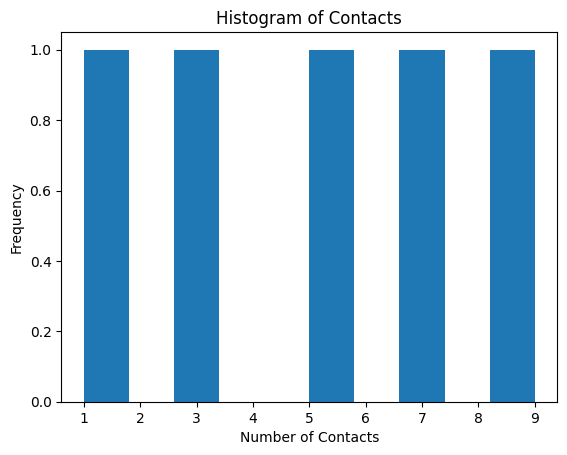

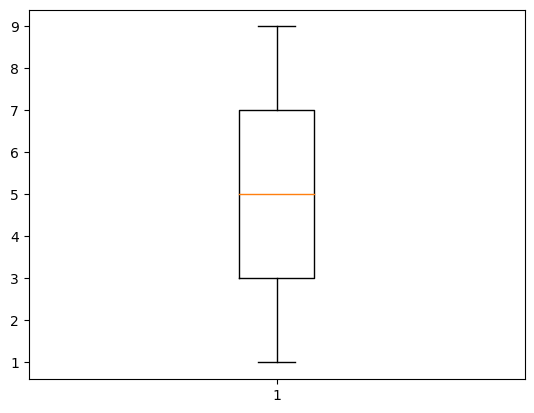

In [86]:
plt.hist(new_data[col]['Contacts'])
plt.title("Histogram of Contacts")
plt.xlabel("Number of Contacts")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['Contacts'])
plt.show()

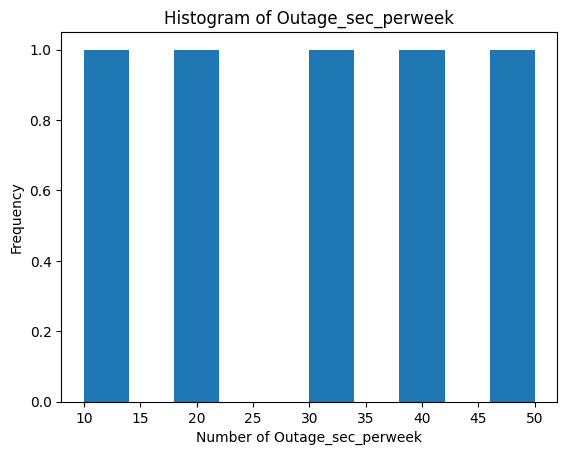

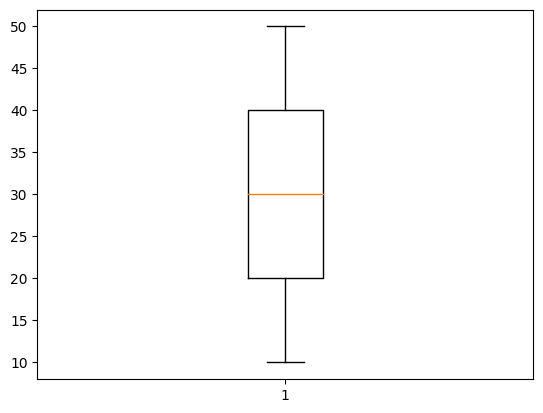

In [87]:
plt.hist(new_data[col]['Outage_sec_perweek'])
plt.title("Histogram of Outage_sec_perweek")
plt.xlabel("Number of Outage_sec_perweek")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['Outage_sec_perweek'])
plt.show()

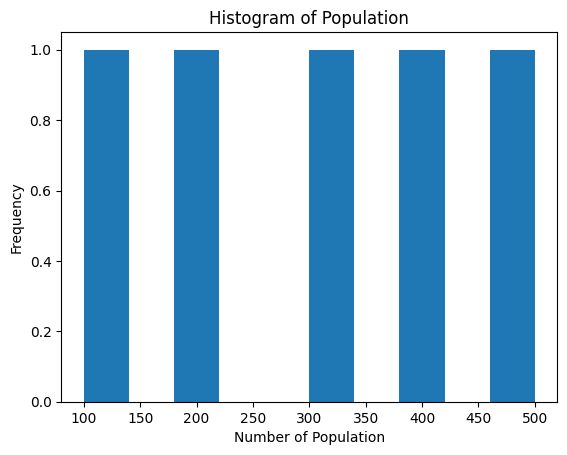

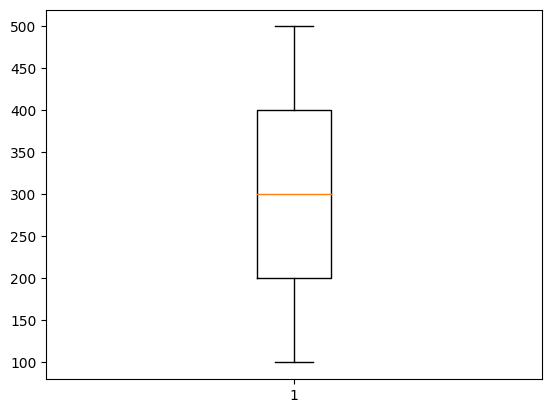

In [88]:
plt.hist(new_data[col]['Population'])
plt.title("Histogram of Population")
plt.xlabel("Number of Population")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['Population'])
plt.show()

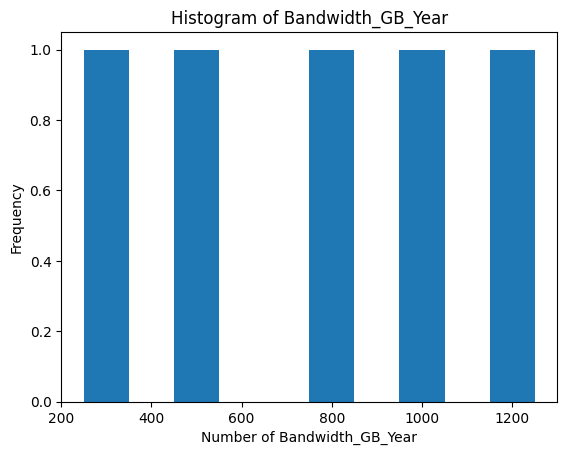

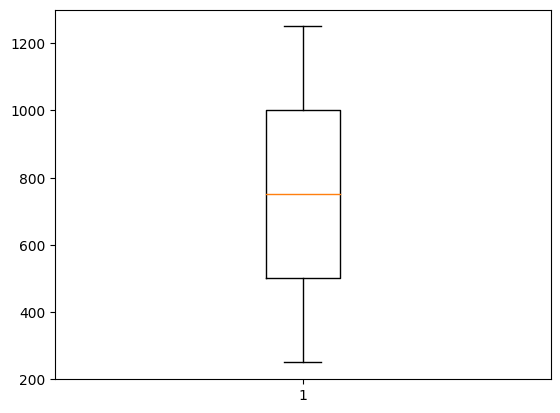

In [89]:
plt.hist(new_data[col]['Bandwidth_GB_Year'])
plt.title("Histogram of Bandwidth_GB_Year")
plt.xlabel("Number of Bandwidth_GB_Year")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['Bandwidth_GB_Year'])
plt.show()

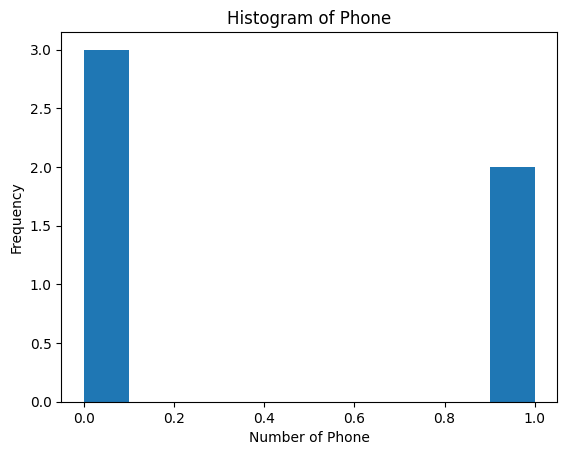

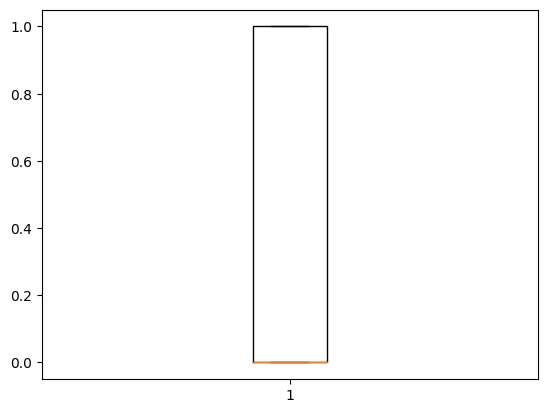

In [92]:
plt.hist(new_data[col]['Phone'])
plt.title("Histogram of Phone")
plt.xlabel("Number of Phone")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['Phone'])
plt.show()

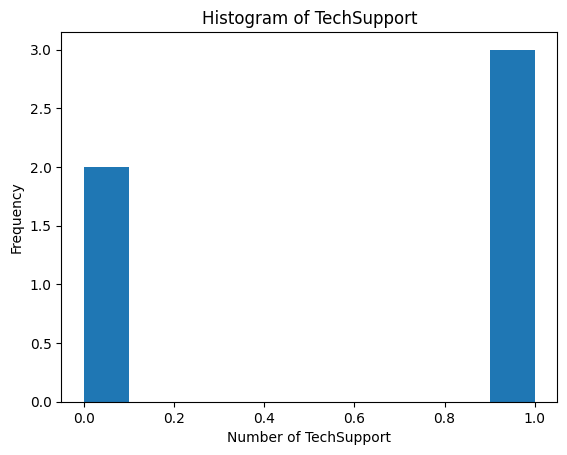

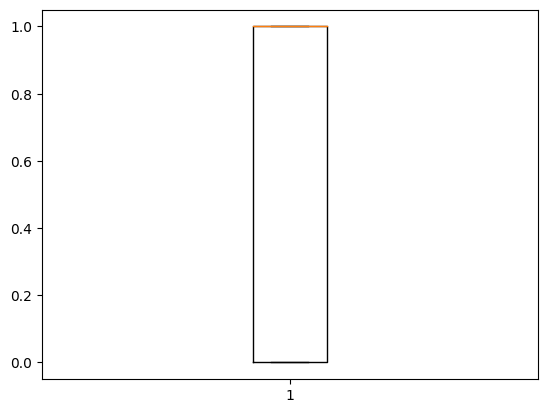

In [93]:
plt.hist(new_data[col]['TechSupport'])
plt.title("Histogram of TechSupport")
plt.xlabel("Number of TechSupport")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['TechSupport'])
plt.show()

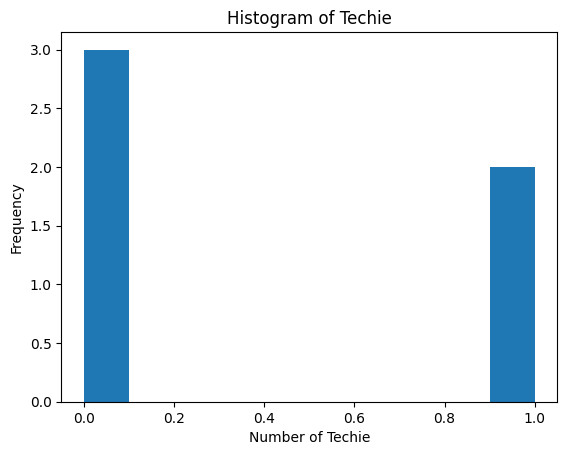

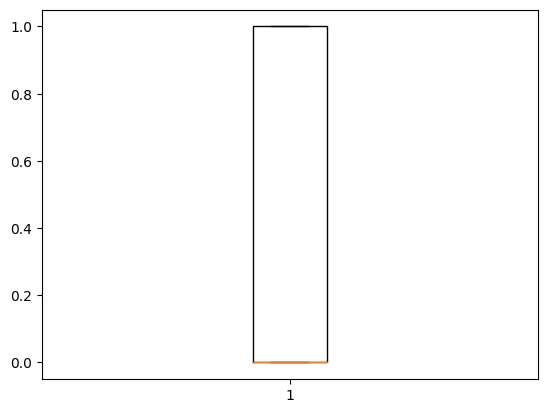

In [94]:
plt.hist(new_data[col]['Techie'])
plt.title("Histogram of Techie")
plt.xlabel("Number of Techie")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(new_data[col]['Techie'])
plt.show()

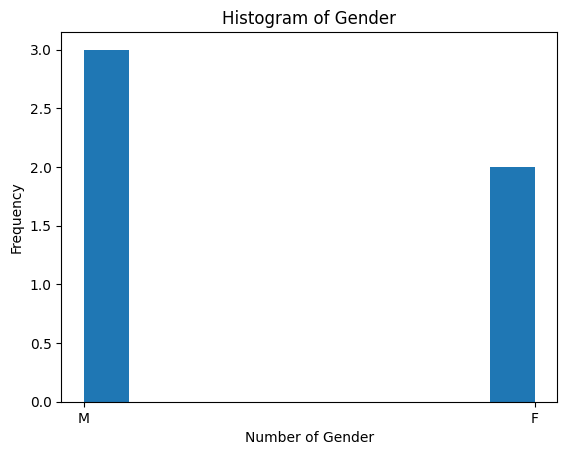

In [176]:
plt.hist(new_data[col]['Gender'])
plt.title("Histogram of Gender")
plt.xlabel("Number of Gender")
plt.ylabel("Frequency")
plt.show()

# Bivariate Analysis 

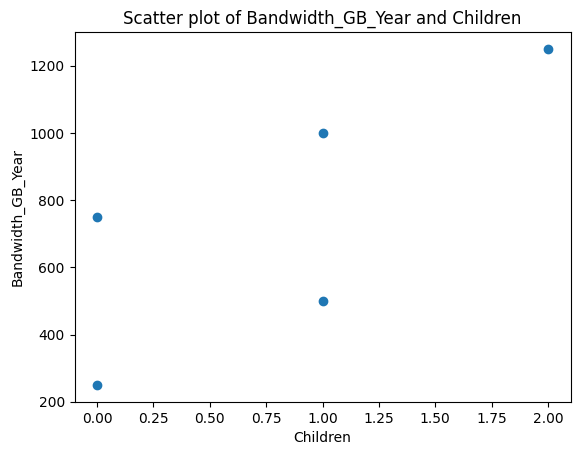

In [153]:
plt.scatter(new_data[col]['Children'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('Children')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Children')
plt.show()

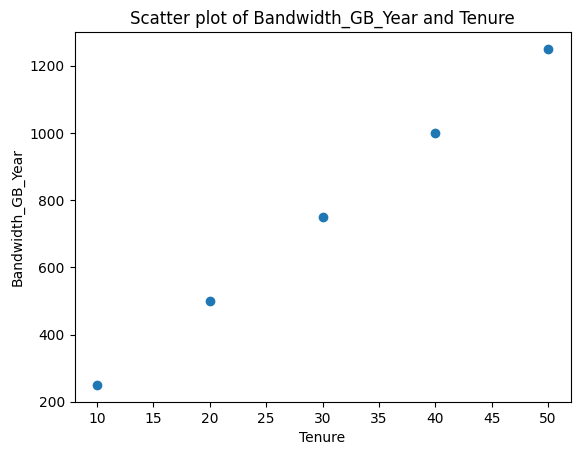

In [105]:
plt.scatter(new_data[col]['Tenure'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('Tenure')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Tenure')
plt.show()

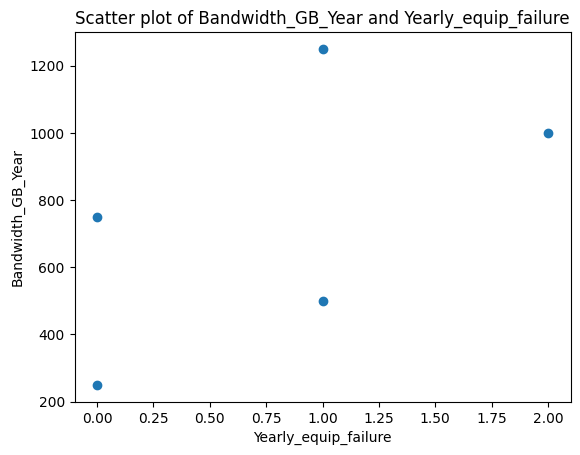

In [103]:
plt.scatter(new_data[col]['Yearly_equip_failure'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('Yearly_equip_failure')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Yearly_equip_failure')
plt.show()

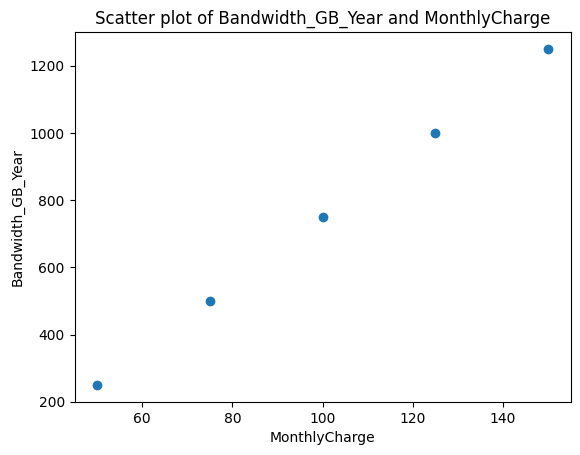

In [104]:
plt.scatter(new_data[col]['MonthlyCharge'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('MonthlyCharge')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and MonthlyCharge')
plt.show()

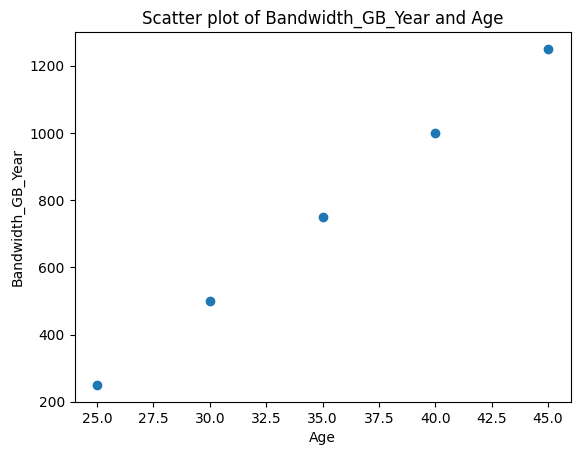

In [106]:
plt.scatter(new_data[col]['Age'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('Age')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Age')
plt.show()

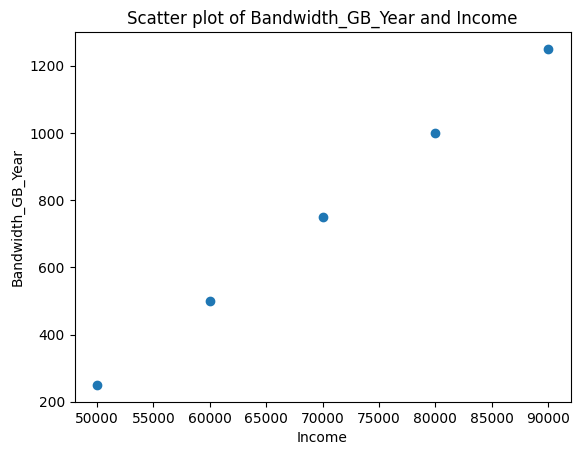

In [107]:
plt.scatter(new_data[col]['Income'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('Income')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Income')
plt.show()

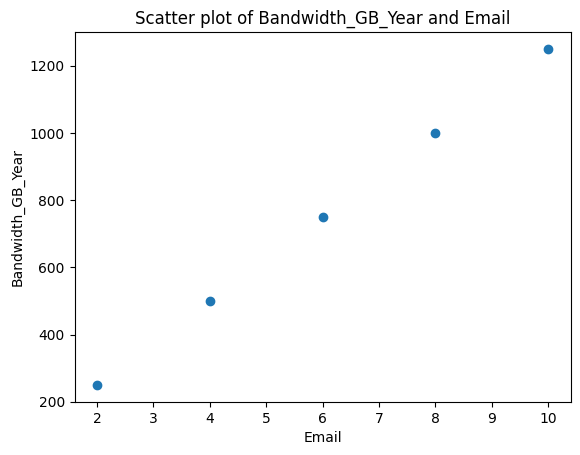

In [108]:
plt.scatter(new_data[col]['Email'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('Email')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Email')
plt.show()

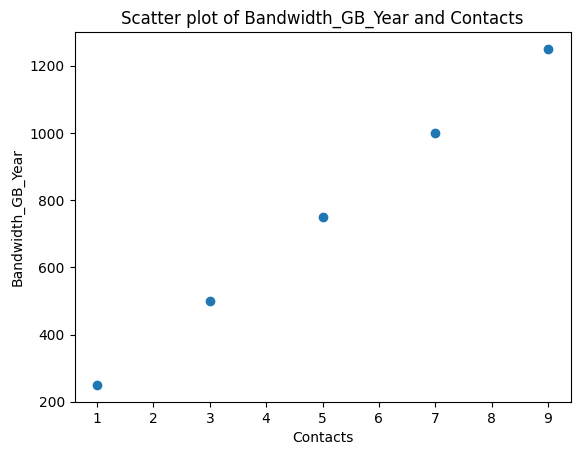

In [109]:
plt.scatter(new_data[col]['Contacts'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('Contacts')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Contacts')
plt.show()

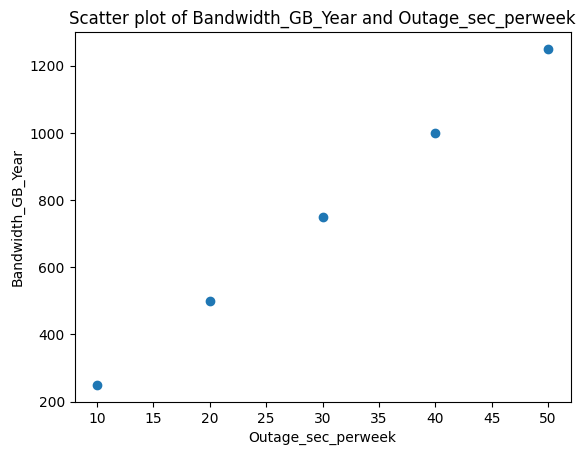

In [110]:
plt.scatter(new_data[col]['Outage_sec_perweek'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('Outage_sec_perweek')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Outage_sec_perweek')
plt.show()

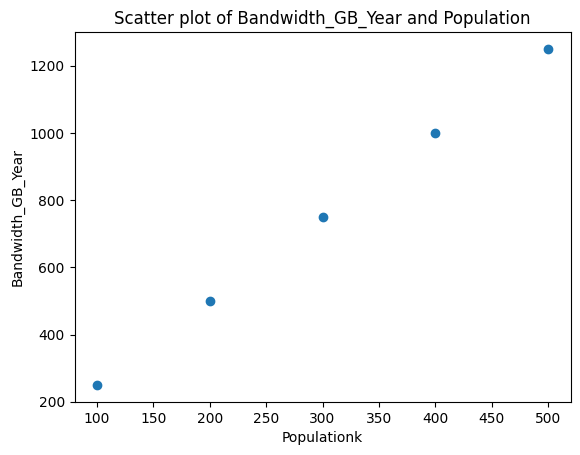

In [111]:
plt.scatter(new_data[col]['Population'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('Populationk')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Population')
plt.show()

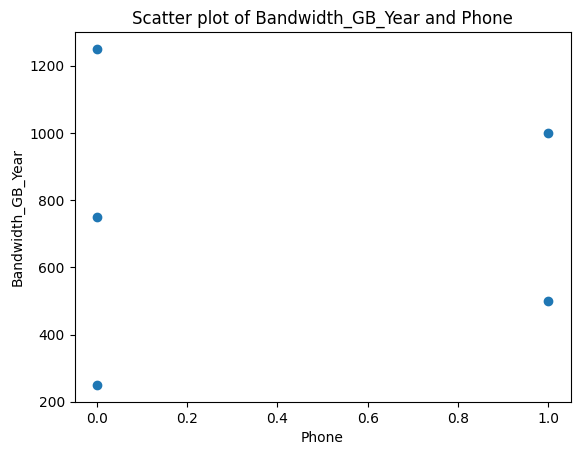

In [112]:
plt.scatter(new_data[col]['Phone'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('Phone')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Phone')
plt.show()

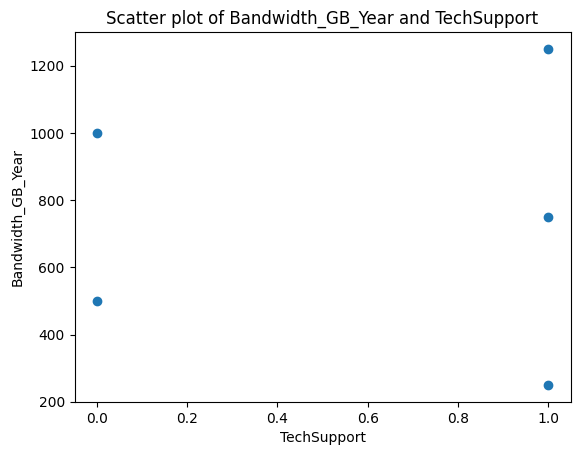

In [113]:
plt.scatter(new_data[col]['TechSupport'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('TechSupport')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and TechSupport')
plt.show()

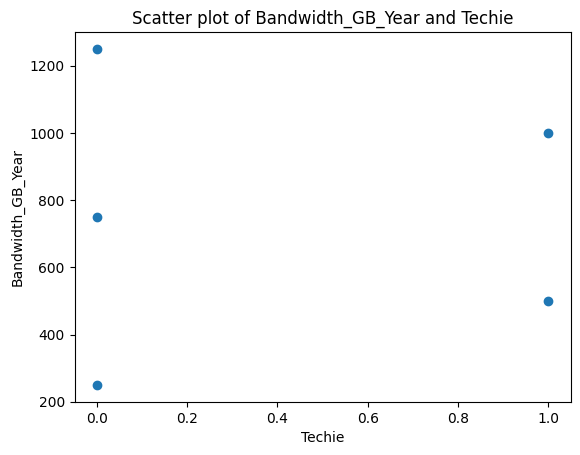

In [114]:
plt.scatter(new_data[col]['Techie'], new_data[col]['Bandwidth_GB_Year'])
plt.xlabel('Techie')
plt.ylabel('Bandwidth_GB_Year')
plt.title('Scatter plot of Bandwidth_GB_Year and Techie')
plt.show()

# Unique Values

In [177]:
new_data[col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Children                      5 non-null      int64  
 1   Tenure                        5 non-null      int64  
 2   Yearly_equip_failure          5 non-null      int64  
 3   MonthlyCharge                 5 non-null      int64  
 4   Age                           5 non-null      int64  
 5   Income                        5 non-null      int64  
 6   Email                         5 non-null      int64  
 7   Contacts                      5 non-null      int64  
 8   Outage_sec_perweek            5 non-null      int64  
 9   Population                    5 non-null      int64  
 10  Bandwidth_GB_Year             5 non-null      int64  
 11  Phone                         5 non-null      int64  
 12  TechSupport                   5 non-null      int64  
 13  Techie   

In [178]:
new_data[col].nunique()

Children                        3
Tenure                          5
Yearly_equip_failure            3
MonthlyCharge                   5
Age                             5
Income                          5
Email                           5
Contacts                        5
Outage_sec_perweek              5
Population                      5
Bandwidth_GB_Year               5
Phone                           2
TechSupport                     2
Techie                          2
Gender                          2
Z_Score_Children                3
Z_Score_Tenure                  5
Z_Score_Yearly_equip_failure    3
Z_Score_MonthlyCharge           5
Z_Score_Age                     5
Z_Score_Income                  5
Z_Score_Email                   5
Z_Score_Contacts                5
Z_Score_Outage_sec_perweek      5
Z_Score_Population              5
Z_Score_Bandwidth_GB_Year       5
Z_Score_Phone                   2
Z_Score_TechSupport             2
Gender_F                        2
Gender_M      

# Saved to new file

In [190]:
new_data[col].to_csv('new_data_col.csv', index=False)